# Page & Frame Replacement Algorithm Simulation

## Init

In [33]:
#Import
import numpy.random as rd;
from numpy import zeros;
from functools import reduce;
from matplotlib import pyplot as plt

# Variable
simpleRS = [7,0,1,2,0,3,0,4,2,3,0,3,0,3,2,1,2,0,1,7,0,1]

lowestRS = 0;
highestRS = 7;

# Classes
class PageTable:
    def __init__(self, capa: int) -> None:
        self.theTable = list(map(lambda _: -1, zeros(capa, dtype=int)));
    def __str__(self) -> str:
        return 'PageTable[' + reduce(lambda a,b: str(a) + " ," + str(b), self.theTable) + ']';

    def setAt(self, index: int, value: int):
        if(index >= len(self.theTable)): 
            raise IndexError(str(index) + " is out of range");
        self.theTable[index] = value;

    def setEmpty(self, value: int):
        if(self.contain(-1)):
            self.setAt(self.index(-1), value)
            return True;
        return False;

    def getAt(self, index: int):
        if(index >= len(self.theTable)): 
            raise IndexError(str(index) + " is out of range");
        return self.theTable[index];

    def size(self):
        return len(self.theTable);

    def index(self, value:int):
        return self.theTable.index(value);

    def copy(self):
        return self.theTable.copy();

    def contain(self, value: int):
        for t in self.theTable:
            if (t == value): return True;
        return False;


# Functions
def getUnifromRS(count :int)->list:
    return rd.randint(lowestRS, highestRS, count)

def getBinomialRS(count: int)->list:
    return rd.binomial(highestRS,0.5,count)

def maxIndexOf(ls:list):
    max_value = max(ls)
    return ls.index(max_value)

def plotReplacement(title:str, frameList: list, pagefaultList: list):
    plt.title(title)
    plt.xlabel("Frame#")
    plt.ylabel("Pagefault#")
    plt.plot(frameList, pagefaultList)
    plt.show()


## Algorithms Implementation

### FIFO

In [17]:
def FIFOSim(frame: int, refStr: list):
    pageFaultCount = 0;
    pT = PageTable(frame);
    currIndex = 0;
    for rs in refStr:
        if(pT.contain(rs)): pass;
        else:
            pT.setAt(currIndex, rs);
            currIndex += 1;
            if(currIndex == frame): currIndex=0;
            pageFaultCount += 1;
    return pageFaultCount
    
simpleRS = [7,0,1,2,0,3,0,4,2,3,0,3,0,3,2,1,2,0,1,7,0,1]
print(FIFOSim(3, simpleRS));

15


### Optimal

In [18]:
def indexOf(ls:list, val:int):
    try:
        return ls.index(val);
    except:
        return len(ls);

def OptimalSim(frame: int, refStr: list):
    pageFaultCount = 0;
    pT = PageTable(frame);
    while(refStr != []):
        currVal = refStr.pop(0);
        if(pT.setEmpty(currVal)):
            pageFaultCount += 1;
        elif(not pT.contain(currVal)):
            temp = pT.copy();
            closestIndexList = list(map(lambda x: indexOf(refStr,x), temp));
            swapIndex = maxIndexOf(closestIndexList);
            pT.setAt(swapIndex, currVal);
            pageFaultCount += 1;
    return pageFaultCount;

simpleRS = [7,0,1,2,0,3,0,4,2,3,0,3,0,3,2,1,2,0,1,7,0,1]
print(optimalSim(3, simpleRS))

9


### LRU

In [23]:
def LRUSim(frame:int, refStr:str):
    recenList = [-1]*frame;
    pageFaultCount = 0;
    pT = PageTable(frame);
    swapIndex = -1;
    for rs in refStr:
        if(pT.setEmpty(rs)):
            swapIndex = recenList.index(-1)
            recenList[swapIndex] = 0;
            pageFaultCount += 1;
        elif(pT.contain(rs)):
            swapIndex = pT.index(rs)
            recenList[swapIndex] = 0;
        else:
            swapIndex = maxIndexOf(recenList);
            pT.setAt(swapIndex, rs);
            pageFaultCount += 1;
            recenList[swapIndex] = 0;
        for i in range(len(recenList)):
            if(i != swapIndex and recenList[i] != -1): recenList[i] += 1;
    return pageFaultCount;

simpleRS = [7,0,1,2,0,3,0,4,2,3,0,3,0,3,2,1,2,0,1,7,0,1]
print(LRUSim(3, simpleRS));


12


## Testing

### 1st Test

In [35]:
refstrNumber = 30;
lowestFrame = 3;
highestFrame = 50;

refString = list(getUnifromRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Uniform Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);

refString = list(getBinomialRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Binomial Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);

### 2nd Test

In [36]:
refstrNumber = 100;
lowestFrame = 3;
highestFrame = 50;

refString = list(getUnifromRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Uniform Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);

refString = list(getBinomialRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Binomial Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);

### 3rd Test

Uniform Reference String


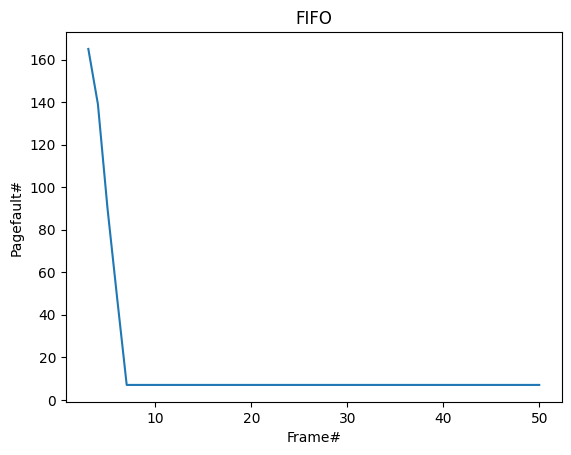

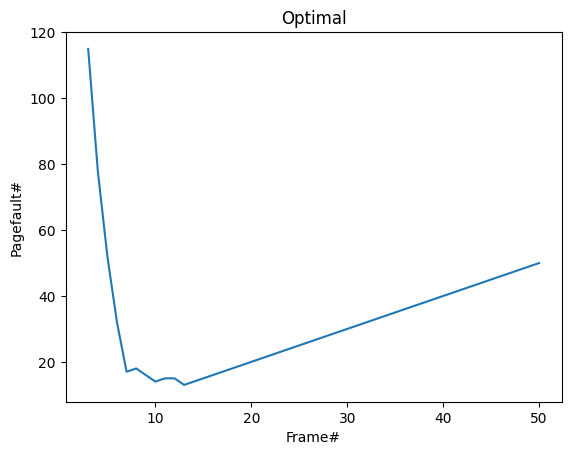

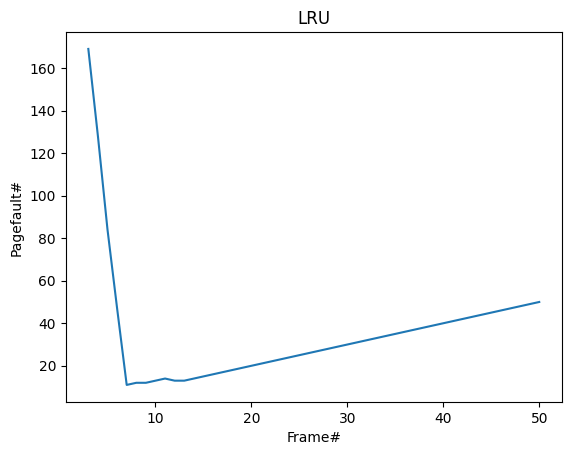

Binomial Reference String


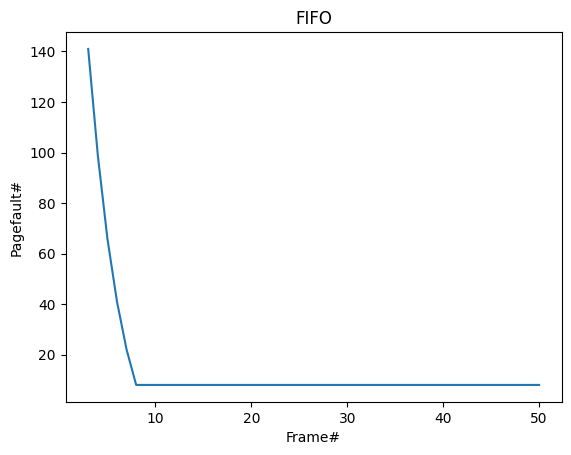

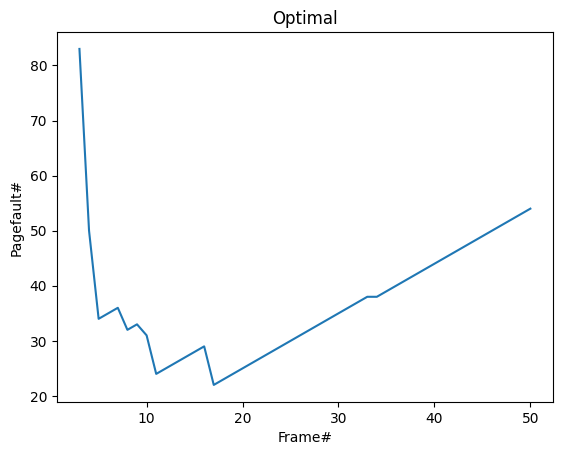

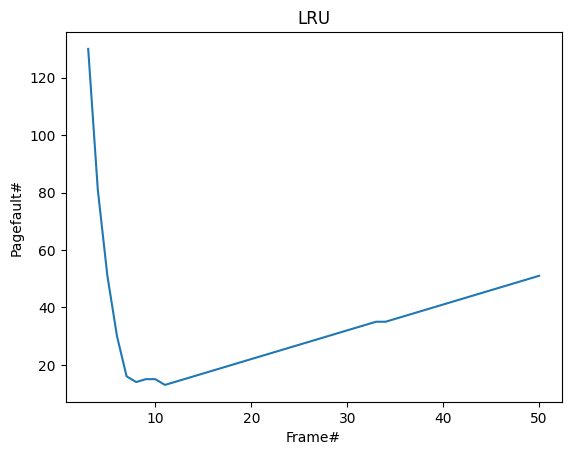

In [37]:
refstrNumber = 300;
lowestFrame = 3;
highestFrame = 50;

refString = list(getUnifromRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Uniform Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);

refString = list(getBinomialRS(refstrNumber));
frameList = list(range(lowestFrame,highestFrame+1));
FIFOResultList = list(map(lambda x: FIFOSim(x,refString.copy()), frameList))
OptimalResultList = list(map(lambda x: OptimalSim(x,refString.copy()), frameList))
LRUResultList = list(map(lambda x: LRUSim(x,refString.copy()), frameList))

print("Binomial Reference String")
plotReplacement("FIFO", frameList, FIFOResultList);
plotReplacement("Optimal", frameList, OptimalResultList);
plotReplacement("LRU", frameList, LRUResultList);